<a href="https://colab.research.google.com/github/cergin07/Iris-Classification-And-Car-Prices-Prediction-Problem/blob/main/%C4%B0brahim_%C3%87a%C4%9Fr%C4%B1_Ergin_20195156024_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/CSE463/perceptron/

/content/drive/MyDrive/CSE463/perceptron


#Iris Classification And Car Prices Prediction Problem

In this notebook,I will explain how can we use a simple perceptron to classify irises and how to implement a regression model to predict a car price.

We use "iris.csv" file for train a perceptron model and we use for "carpricetrain.csv" a regression model.

After a model builded, we will test it on "irismodified.csv" and "carpricestest.csv"

> Specifically for these problem , we are going to do the following:
> - Load the dataset
> - Preprocess the data
> - Build the model
> - Train the model
> - Predict data

**Before we build the models,we should talk about what a perceptron is.**

A perceptron is a neural network unit that does certain computations to detect features or business intelligence in the input data. A perceptron is an algorithm for supervised learning of binary classifiers.This algorithm enables neurons to learn and processes elements in the traning set one at a time.

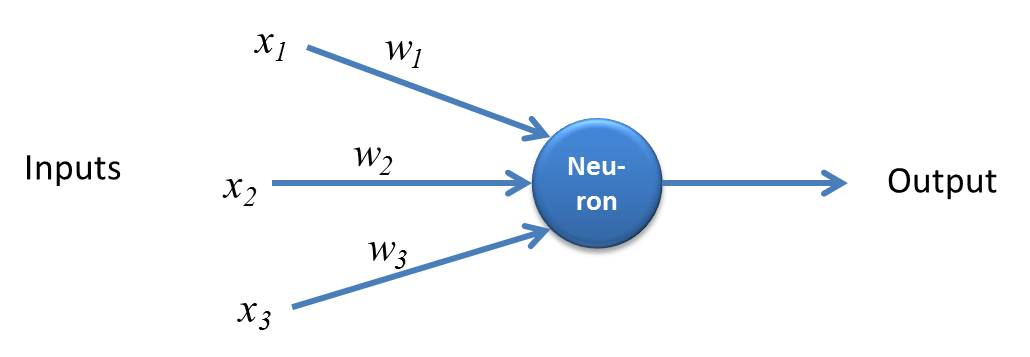

There are two types of Perceptrons:Single layer and Multilayer. Single layer Perceptrons can learn only linearly seperable patterns.Multilayer Perceptrons or freedforward neural networks with two or more layers have the greater processing power. The Perceptron algorithm learns the weights for the input signals in order to draw a linear decision boundary.This enables us to distinguish between the two linearly seperable clases +1 and 0.


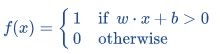

In the equation given above:


*   "w" = vector of real-values weights
*   "b"=bias(an element that adjusts the boundry away from origin without any dependence on the input value)
*   "x" = vector of input x values



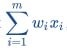





*   "m" = number of inputs to the Perceptron.
*   The output can be represented as "1" or "0".It can also be represented as "1" or "-1" depending on which activation function is used.

In this problem we will build single layer perceptron according to the above formulas.


**Import Neccesarry Libraries**

In [ ]:
import pandas as pd
import numpy as np
import abc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

Now we create a class named "Trainer". Trainer class is base class for perceptron model, and regression model.In this method we will define methods which will define as abstractmethod for override them in Iris and Car classes.



**> ReadCsvFilesAndModify** method is responsible for reading the csv file and preparing the data.

**> GetTrainSet** method returns modified data set.

**> InitializeWeightsAndBias** method is responsible for generate first values of weight and bias.

**> UpdateWeightAndBias** method is responsible for training weight,bias for perceptron and traning weight and finding a cost list for regression problem.

**> Train** method is main method to build a model, calculate weight,bias or cost list

**Now lets create Trainer class. **


In [ ]:
class Trainer:
  
  @abc.abstractmethod
  def ReadCsvFilesAndModify(self,fileName,learningRate=0.001):
    pass

  @abc.abstractmethod
  def GetTrainSet(self):
    pass

  @abc.abstractmethod
  def InitializeWeightsAndBias(self,dimension):
    pass
  @abc.abstractmethod
  def UpdateWeightAndBias(self,features=None, labels=None,weight =None,numberOfIterarion=None ):
    pass
 
  @abc.abstractmethod  
  def Train(self,featuresTrain=None, featuresTest=None, labelsTrain=None, labelsTest=None, IterationsNumber=None,features=None, labels=None,weight=None):
    pass

**Let's create an Iris class to define the methods for the iris classification problem.**

This Iris class is inherited from Trainer class and this class has got:

> ReadCsvFilesAndModify(Override)

> GetTrainSet(Override)

> InitializeWeightsAndBias(Override)

> UpdateWeightAndBias(Override)

> Activation

> Predict

> PredictionForSets

> CalculateAccuracy

> CalculatePrecision

> CalculateRecall

> CalculateVariables

> Train 

methods.

**ReadCsvFilesAndModify** reads datas from csv file as data frame and trasform string values to integer values and splits the data to test and train.It takes a file name as a parameter and returns splitted data.
After this method finisih process train and test datas look like: 
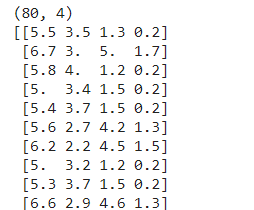

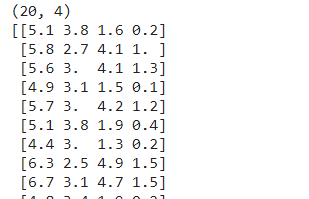

Also lets look at Trrain Labels and Test Labels: 

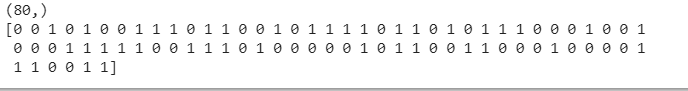

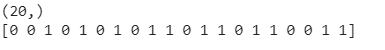


**GetTrainSet** method returns data sets which modified by ReadCsvFilesAndModify method before.

**InitializeWeightsAndBias** method generates first values for weight and bias.

w=[0. 0. 0. 0.]

b=  0.0

**Activation** method takes "pred" parameter as a single float number and checks if its heigher than activation number and according to this it returns 1 or 0.

**Predict** method takes features,weight and bias as parameters and it calculates the result of scalar multpilication of features and weight parameters.After that adds bias and keeps final result as variable.And sends this variable to Activation method and returns what comes from Activaion method.

**UpdateWeightAndBias** method takes four parameters as nullable.In perceptron problem this method use features,labels and numberOfIteration parameters.
In this method first values generated for weight and bias with using ***InitializeWeightsAndBias*** method.In a for loop, it subtracts the predicted label from the actual label. It multiplies the return result by the learning rate value and keeps the result in a variable called ***deltaweights***. Predicted value comes from ***Predict*** method.In this method we send a row in features set and also weights and bias variables to Predict method.After that process we update bias and weights using deltaweights.End of the for loop method returns calculated weight and bias variables.

**CalculateAccuracy** method calculate accuracy.And uses this formula:

(TP+TN)/(TP+TN+FP+FN)

**CalculatePrecision** method calculate Precision.And uses this formula:

(TP)/(TP+FP)

**CalculateRecall** method calculate Recall.And uses this formula:

(TP)/(TP+FN)

**CalculateVariables** method takes actual labels and predicted labels as parameters and calculates true possitive,true negative,false possitive and false negative variables.And then returns them.

**PredictionForSets** method takes a features set,a labels set,calculated weight and calculated bias as parameters.This method calls **Predict** method to make a prediction for all set.

**Train** method is the main method to calls corressponding methods calculate final weight and bias variables,prediction for train or test sets, calculate accuracy,precision and recall variables.



In [ ]:
class Iris(Trainer):
  def __init__(self,fileName,learningRate=0.0001):
    self.trainSet = {}
    self.fileName=fileName
    self.learningRate=learningRate
    self.trainSet=self.ReadCsvFilesAndModify(fileName)

  def ReadCsvFilesAndModify(self,fileName):
      trainSet = pd.read_csv(fileName);
      df_shuffled=trainSet.sample(frac=1)
      labels=df_shuffled.iloc[0:,4].values
      labelencoder = LabelEncoder()
      labels=labelencoder.fit_transform(labels)
      features = df_shuffled.iloc[0:,0:4].values
      mask = np.where((labels==0) | (labels==1))
      features=features[mask]
      labels=labels[mask]   
      featuresTrain,featuresTest,labelsTrain,labelsTest=train_test_split(features,labels,test_size=0.2,random_state=42)
      datas = {"featuresTrain": featuresTrain,"featuresTest":featuresTest,"labelsTrain":labelsTrain,"labelsTest":labelsTest};
      return datas;

  def GetTrainSet(self):
      return self.trainSet

  def InitializeWeightsAndBias(self,dimension):
    w = np.zeros(dimension)
    b = 0.0
    return w, b
  
  def UpdateWeightAndBias(self,features=None, labels=None,weight =None,numberOfIterarion=None ):
    weights,bias =self.InitializeWeightsAndBias(features.shape[1])
    for i in range(numberOfIterarion):
      index=0
      for sample in features:
        deltaWeights = self.learningRate * (labels[index]-self.Predict(sample,weights,bias))
        weights += deltaWeights*sample
        bias += deltaWeights
        index+=1
    return weights,bias

  def Activation(self,pred):
    return np.where(pred >= 0.5,1,0)

  def Predict(self,features,weights,bias):
    calculated_input=np.dot(features,weights)+bias
    return self.Activation(calculated_input)

  
  def PredictionForSets(self,dataSet_features,dataSet_labes,weightFinal,biasFinal):
      prediction=[]
      zipper=zip(dataSet_features,dataSet_labes)
      for sample,result in zipper:
        predictionFinal = self.Predict(sample,weightFinal,biasFinal)
        prediction.append(predictionFinal)
      return prediction

  #Accuracy = (TP+TN)/(TP+TN+FP+FN)
  def CalculateAccuracy(self,tp,tn,fp,fn):
    return float((tp+tn)/(tp+fp+tn+fn))

  #Precision = (TP)/(TP+FP)
  def CalculatePrecision(self,tp,fp):
    return float((tp)/(tp+fp))
    
  #Recall = (TP)/(TP+FN)
  def CalculateRecall(self,tp,fn):
    return float((tp)/(tp+fn))

  def CalculateVariables(self,actualValues,predictedValues):
    TP,TN,FP,FN=0,0,0,0
    for i in range(len(actualValues)):
      if actualValues[i] == predictedValues[i]:
        if predictedValues[i]==1:
          TP +=1
        else:
          TN +=1
      else:
        if predictedValues[i]==1:
          FP +=1
        else:
          FN +=1
           
    return TP,TN,FP,FN

  def Train(self,featuresTrain=None, featuresTest=None, labelsTrain=None, labelsTest=None, IterationsNumber=None,features=None, labels=None,weight=None):
    dimension = featuresTrain.shape[1]
    w, b = self.InitializeWeightsAndBias(dimension)
    weightFinal,biasFinal = self.UpdateWeightAndBias(features=featuresTrain, labels=labelsTrain,numberOfIterarion =  IterationsNumber) 
    y_prediction_train=self.PredictionForSets(featuresTrain,labelsTrain,weightFinal,biasFinal)
    y_prediction_test=self.PredictionForSets(featuresTest,labelsTest,weightFinal,biasFinal)


    TP,TN,FP,FN = self.CalculateVariables(labelsTrain,y_prediction_train)
    y_prediction_train_acc=self.CalculateAccuracy(TP,TN,FP,FN)
    y_prediction_train_pre=self.CalculatePrecision(TP,FP)
    y_prediction_train_rec=self.CalculateRecall(TP,FN)

    

    TP,TN,FP,FN = self.CalculateVariables(labelsTest,y_prediction_test)
    y_prediction_test_acc=self.CalculateAccuracy(TP,TN,FP,FN)
    y_prediction_test_pre=self.CalculatePrecision(TP,FP)
    y_prediction_test_rec=self.CalculateRecall(TP,FN)

    print("train accuracy: {} %".format(y_prediction_train_acc*100))
    print("train precision: {} %".format(y_prediction_train_pre*100))
    print("train recall: {} %".format(y_prediction_train_rec*100))
    print("test accuracy: {} %".format(y_prediction_test_acc*100))
    print("test precision: {} %".format(y_prediction_test_pre*100))
    print("test recall: {} %".format(y_prediction_test_rec*100))

**Now Let's use our prepared class and methods on the iris.csv file and examine the results**

In [ ]:
perceptron=Iris("iris.csv")
trainDatas=perceptron.GetTrainSet()
perceptron.Train(featuresTrain= trainDatas["featuresTrain"],featuresTest= trainDatas["featuresTest"], labelsTrain= trainDatas["labelsTrain"],labelsTest= trainDatas["labelsTest"],IterationsNumber=15)



train accuracy: 98.75 %
train precision: 100.0 %
train recall: 97.61904761904762 %
test accuracy: 85.0 %
test precision: 100.0 %
test recall: 62.5 %


**Percision** evaluates the fraction of correctly classified instances or samples among the ones classified as positives.The Formula:

**(TP)/(TP+FP)**

**Accuracy** evaluates the fraction of correctly classified instances or samples among the ones classified as positives or negatives.The Formula:

**(TP+TN)/(TP+TN+FP+FN)**

**Recall** is the quantity of right predictions the model made concerning the total positive values present.The Formula:

**(TP)/(TP+FN)**



**Now Let's use our prepared class and methods on the irismodified.csv file and examine the results**

In [ ]:
perceptron=Iris("irismodified.csv")
trainDatas=perceptron.GetTrainSet()
perceptron.Train(featuresTrain= trainDatas["featuresTrain"],featuresTest= trainDatas["featuresTest"], labelsTrain= trainDatas["labelsTrain"],labelsTest= trainDatas["labelsTest"],IterationsNumber=50)

train accuracy: 79.48717948717949 %
train precision: 84.84848484848484 %
train recall: 71.7948717948718 %
test accuracy: 95.0 %
test precision: 100.0 %
test recall: 90.0 %


# Car's Price Prediction Problem

In this problem, I will change our methods little bit for prediction. Linear regression model will be used in this problem.

First of all, I will generate a class named Car.

This Car class is inherited from Trainer class and this class has got:

> ReadCsvFilesAndModify(Override)

> GetTrainSet(Override)

> InitializeWeightsAndBias(Override)

> UpdateWeightAndBias(Override)

> GetSummaries

> ComputeCost

> Train 

methods.

**ReadCsvFilesAndModify** reads datas from csv file as data frame and trasform string values(FuelType,tansmission) to integer values and drop price and model column from data set and keeps the others in features variable.Label variable keeps price column.Also in this method I normalise features so the values lie between -1 and 1.I do this so i can get all features into a similar range.The formula:

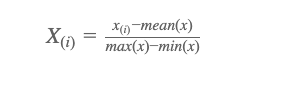

After this process, i add a new column of ones to features for easier matrix manipulation.And method returns datasets and variables.

**GetTrainSet** method simply returns dataset.

**InitializeWeightsAndBias** method generates first value of weight.

**ComputeCost** method define a cost function which gradient descent will use to determine the cost of each weight.

**UpdateWeightAndBias** method calculates a new weight on each loop and keep track of its cost.

**Train** method is the main method where all calculates are done.

In [ ]:
import seaborn as sns
import math
import operator
from sklearn import metrics

In [ ]:
class Car(Trainer):
  def __init__(self,fileName,learningRate=0.01):
    self.trainSet = {}
    self.fileName=fileName
    self.learningRate=learningRate
    self.trainSet=self.ReadCsvFilesAndModify(fileName)

  def ReadCsvFilesAndModify(self,fileName):
      trainSet = pd.read_csv(fileName);
      trainSet = pd.get_dummies(trainSet,columns=['fuelType','transmission'],drop_first=True)
      plt.figure(figsize=(10,7))
      sns.heatmap(trainSet.corr(),annot=True)
      plt.title('Correlation between the columns')
      plt.show()
      features=trainSet.drop(['model','price'],axis=1)
      features=features.to_numpy()

      labels=trainSet['price']
      labels = labels.to_numpy().transpose() 
      m,n=features.shape
      mu=features.mean(0)
      sigma=features.std(0)
      xn=(features-mu) /sigma
      xo = np.hstack((np.ones((m, 1)), xn))
      datas = {"mean": mu,"sigma":sigma,"xmeans":xn,"features":xo,"labels":labels,"m":m,"n":n};
      return datas;

  def GetTrainSet(self):
      return self.trainSet

  def GetSummaries(self,trainSet,columnName):
    self.mean = 0
    self.mean = sum(trainSet[columnName])/float(len(trainSet[columnName]))
    return self.mean

  def InitializeWeightsAndBias(self,dimension):
    w = np.zeros(dimension+1)
    b = 0.0
    return w, b

  def ComputeCost(self,features, labels, weight):
    m = len(labels) 
    diff = np.matmul(features, weight) - labels
    C = 1 / (2 * m) * np.matmul(diff, diff)
    return C  

  def UpdateWeightAndBias(self,features=None, labels=None,weight=None,numberOfIterarion=None):
    m = len(labels) 
    costList = []
    for i in range(numberOfIterarion):
      hc = np.matmul(features, weight) - labels
      weight -= self.learningRate / m * np.matmul(features.transpose(), hc)
      costList.append(self.ComputeCost(features, labels, weight))
    return weight, costList


  def Train(self,featuresTrain=None, featuresTest=None, labelsTrain=None, labelsTest=None, IterationsNumber=None,features=None, labels=None,weight=None):
    weightFinal, costList = self.UpdateWeightAndBias(features=features, labels=labels, weight=weight,numberOfIterarion= IterationsNumber)
    plt.plot(np.arange(IterationsNumber), costList, "-b", LineWidth=2)
    plt.xlabel("Number of iterations")
    plt.ylabel("Cost J")
    plt.show()
    y_pred = np.matmul(features, weightFinal)
    diff = (y_pred / labels * 100)
    print('RMSE: ',np.sqrt(metrics.mean_squared_error(labels, y_pred)))
    print('Mean of results: ',diff.mean())
    print('Deviation of results: ',diff.std())
    print('Results within 10% support/resistance: ', len(np.where(np.logical_and(diff>=90, diff<=110))[0]) / datas["m"] * 100)
    plt.plot(np.arange(datas["m"]), diff, '-b', LineWidth=1)
    plt.xlabel('Number')
    plt.ylabel('Accuracy %')
    plt.show()

**Now let's train my model on carpricestrain.csv file.**
I use Root Mean Squared Error(RMSE) which is the square root of the mean of the squared errors.The result will be used later for a comparision.The Formula:

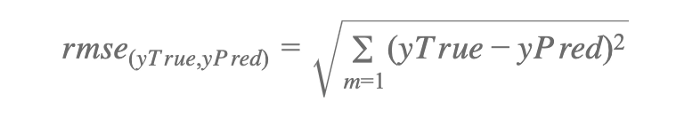

Also I work out the percentage each prediction has of the true prediction.Then i use this to find the number of predicted value that fall within 90% to 110% of the actual value.


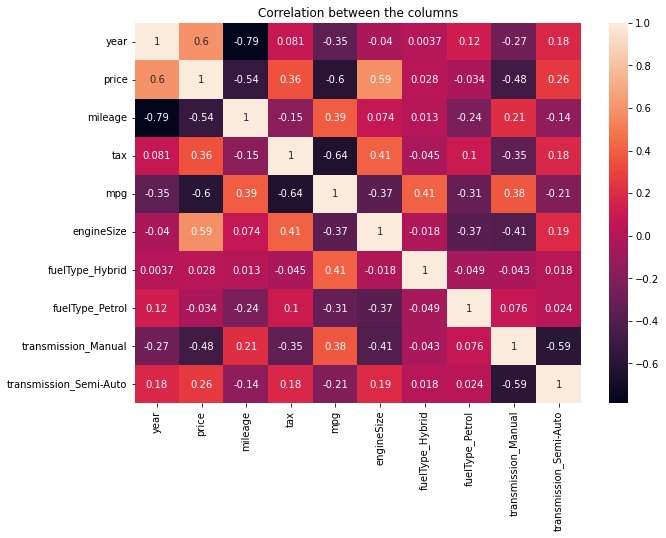

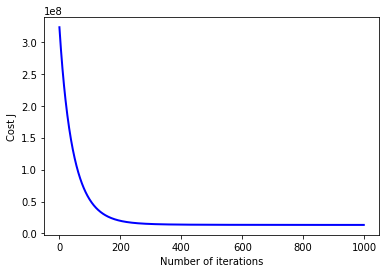

RMSE:  5173.186401206455
Mean of results:  100.19867561967342
Deviation of results:  35.59210594479497
Results within 10% support/resistance:  45.621317621853244


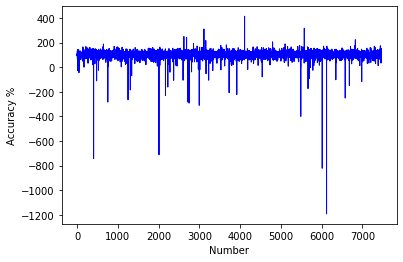

In [ ]:
car = Car("carpricestrain.csv")
datas=car.GetTrainSet()
weights,bias = car.InitializeWeightsAndBias(datas["n"])
car.Train(features=datas["features"],labels=datas["labels"],weight=weights,IterationsNumber=1000)


**Now I will test my model on carpricestest.csv file.**

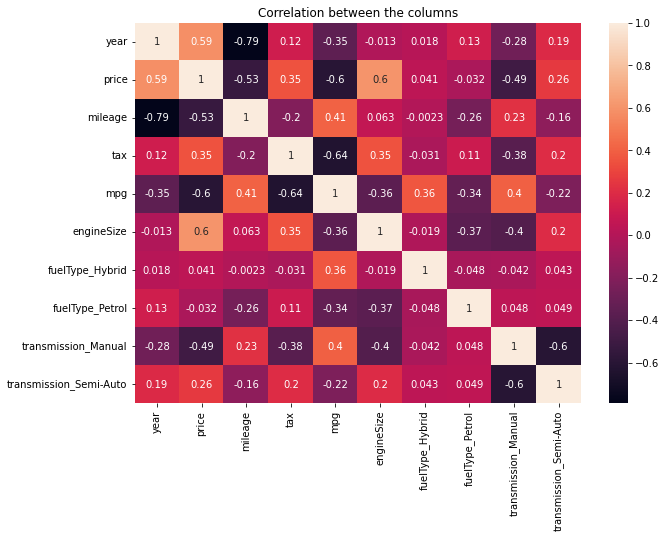

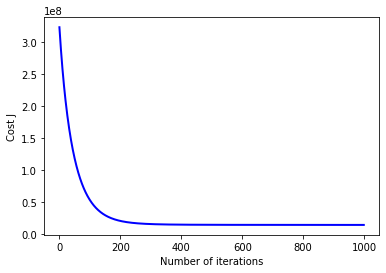

RMSE:  5328.357030186626
Mean of results:  100.61602467873665
Deviation of results:  30.964711106264737
Results within 10% support/resistance:  42.90625


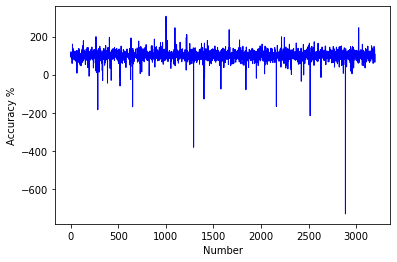

In [ ]:
car = Car("carpricestest.csv")
datas=car.GetTrainSet()
weights,bias = car.InitializeWeightsAndBias(datas["n"])
car.Train(features=datas["features"],labels=datas["labels"],weight=weights,IterationsNumber=1000)

**# Now I will use sklearn's linear regression to compare results.**


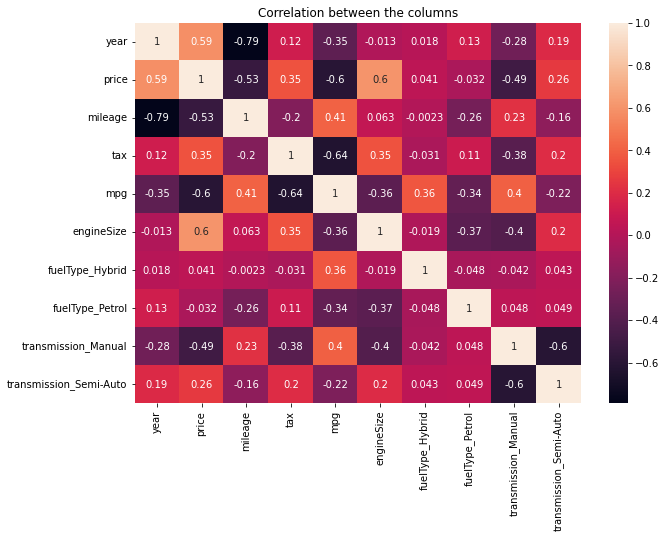

RMSE:  5154.324578395023
Mean of results:  101.78559714722394
Deviation of results:  24.705430596556145
Results within 10% support/resistance:  42.5


In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

car = Car("carpricestest.csv")
datas=car.GetTrainSet()
X_train, X_test, y_train, y_test = train_test_split(datas["features"], datas["labels"], random_state=1)

lr = LinearRegression()

lr.fit(X_train, y_train)

prediction = lr.predict(X_test)

print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test, prediction)))

differences = (prediction / y_test * 100)
print('Mean of results: ',differences.mean())
print('Deviation of results: ',differences.std())
print('Results within 10% support/resistance: ', len(np.where(np.logical_and(differences>=90, differences<=110))[0]) / len(prediction) * 100)

**As you can see results are similar in both methods.**